In [1]:
import cv2
import json
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import shutil
% matplotlib inline

# Original Image

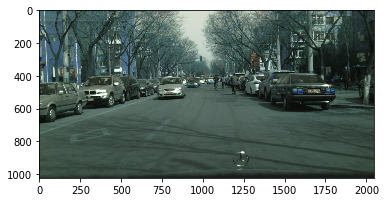

In [2]:
im = cv2.imread("/media/talha/73fb317f-f61e-4b1f-b59e-5121d06d212b/Code(ACF)/data/Tsinghua-Daimler/train/pos/tsinghuaDaimlerDataset_2015-03-20_025811_000046782.png")
plt.imshow(im)

# Actual Labels

In [7]:
# cyclist 1065 396 33 88 0 0 0 0 0 0 0
# cyclist 1112 399 30 81 0 0 0 0 0 0 0
# cyclist 1171 387 48 132 0 0 0 0 0 0 0

# Sample Cyclist

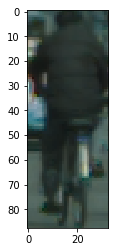

In [3]:
plt.figure()
plt.imshow(im[396:396+88,1065:1065+33])

# Cropped 832-832 patch via matlab

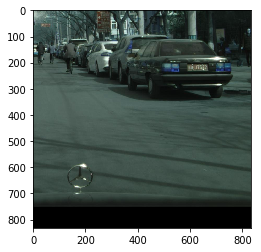

In [7]:
im = cv2.imread("data/obj/tsinghuaDaimlerDataset_2015-03-20_025811_000046782_2.jpg")
plt.imshow(im)

# Labels after mapping

In [ ]:
# 0 0.528080 0.429690 0.016113 0.085938 
# 0 0.550290 0.429200 0.014648 0.079102 
# 0 0.583500 0.442380 0.023438 0.128910 

# After back conversion

In [ ]:
# Conversion to 832-832 433 322 13 72

# Recalculated 1065 396 33 88 

# Actual 1065 396 33 88

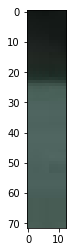

In [8]:
plt.figure()
plt.imshow(im[322:322+72,433:433+13])

In [4]:
file = "./data/overfit.txt"

f=open(file, "r")
lines = []

for x in f:
    
    lines.append(x)
lines    

['data/obj/tsinghuaDaimlerDataset_2015-03-20_025811_000046782_2.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2014-12-04_082614_000052727_1.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2014-11-20_082922_000063547_2.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2014-11-24_084824_000040110_2.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2015-03-24_041424_000033241_1.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2015-03-24_041424_000033116_1.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2015-03-20_025811_000014513_1.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2014-11-24_084824_000037320_2.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2014-11-20_075523_000005834_1.jpg\n',
 'data/obj/tsinghuaDaimlerDataset_2014-11-20_082922_000059797_2.jpg\n']

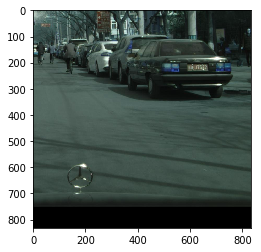

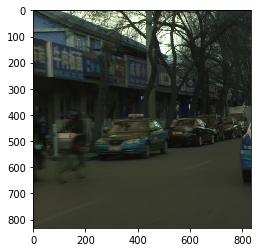

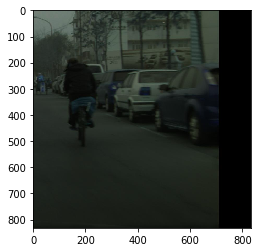

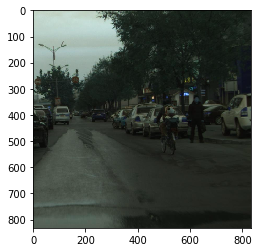

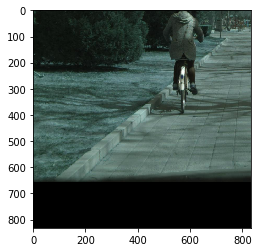

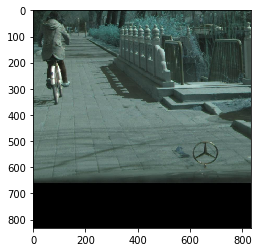

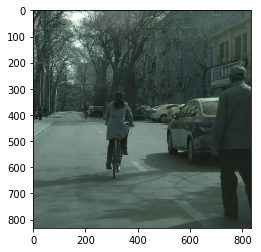

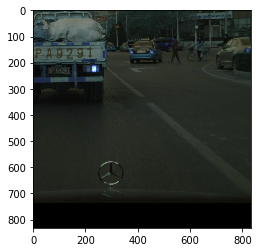

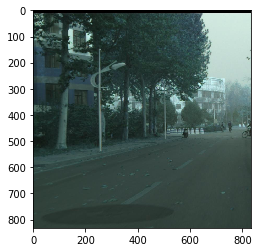

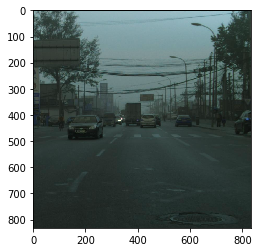

In [5]:
for l in lines:
    img = cv2.imread(l.split()[0])
    plt.figure()
    plt.imshow(img)

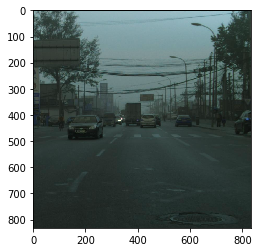

In [8]:
im = cv2.imread("data/obj/tsinghuaDaimlerDataset_2014-11-20_082922_000059797_2.jpg")
plt.imshow(im)

In [ ]:
0 0.271730 0.223630 0.010742 0.058594 
1091 398 22 60 0 0 0 0 0 0 0
443 323 9 49

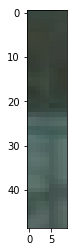

In [9]:
plt.figure()
plt.imshow(im[323:323+49,443:443+9])

# Verify mapping of predicted bounding boxes

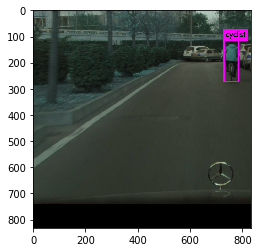

In [15]:
im = cv2.imread("./predictions.jpg")
plt.imshow(im)

In [16]:
files = os.listdir("./")
pfiles = []
for f in files:
    if "prediction" in f:
        if "txt" in f:
            pfiles.append(f)
pfiles

['prediction_0.txt']

In [17]:
left = []
top = []
right = []
bottom = []
for i in range(len(pfiles)):
    f1 = open(pfiles[i], "r")    
    for l in f1:
        left.append(int(l.split("\n")[0].split("=")[1].split(",")[0]))
        top.append(int(l.split("\n")[0].split("=")[2].split(",")[0]))
        right.append(int(l.split("\n")[0].split("=")[3].split(",")[0]))
        bottom.append(int(l.split("\n")[0].split("=")[4]))

In [18]:
right,bottom

([787], [274])

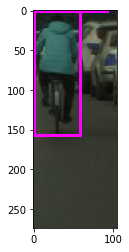

In [19]:
for i in range(len(top)):
    plt.figure()
    plt.imshow(im[top[i]:top[i]+bottom[i],left[i]:left[i]+right[i]])

In [20]:
xpo = []
ypo = []

f1 = open("pr.txt", "r")    
for l in f1:
    xpo.append(l.split()[0])
    ypo.append(l.split()[1])

In [21]:
xpo,ypo

(['514.599000', '1673.365900'], ['284.588800', '316.000000'])

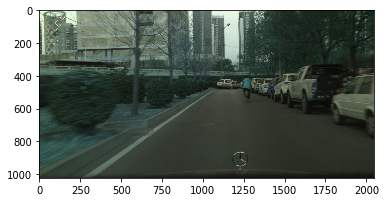

In [22]:
im = cv2.imread("./original.png")
plt.imshow(im)

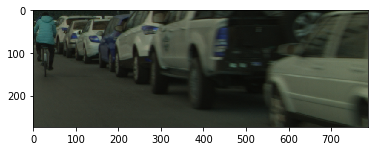

In [23]:
for i in range(len(top)):
    plt.figure()
    #plt.imshow(im[top[i]:top[i]+bottom[i],left[i]:left[i]+right[i]])
    #plt.imshow(im[top[i]+int(np.round(float(ypo[i]))):top[i]+int(np.round(float(ypo[i])))+bottom[i],left[i]+int(np.round(float(xpo[i]))):left[i]+int(np.round(float(xpo[i])))+right[i]])
    plt.imshow(im[top[i]+285:top[i]+285+bottom[i],left[i]+515:left[i]+515+right[i]])

In [24]:
top,left,right,bottom

([115], [727], [787], [274])

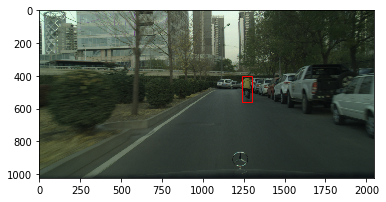

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('original.png'), dtype=np.uint8)

for i in range(len(top)):

    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    rect = patches.Rectangle((left[i]+int(np.round(float(xpo[i]))),top[i]+int(np.round(float(ypo[i])))),right[i]-left[i],bottom[i]-top[i],linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()

In [26]:
def draw_rects(img, rects):
    """
    ?????????????
    :param img: 
    :param rects: 
    :return: 
    """
    for x, y, w, h in rects:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 00), 2)
        face = img
        text = "Cyclist"
        cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=cv2.LINE_AA) 
    cv2.imshow("Output",img)
    cv2.waitKey()   
    cv2.destroyAllWindows()

In [ ]:
rects = []
for i in range(len(top)):
    rects.append([left[i]+int(np.round(float(xpo[i]))),top[i]+int(np.round(float(ypo[i]))),right[i]-left[i],bottom[i]-top[i]])
draw_rects(im,rects)